In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='whitegrid', font_scale=1.5)

In [2]:
def make_figure(df, matrix_name='quantcore.matrix', title=None):
    df2 = (
        df.set_index(['operation', 'storage'])
        .stack()
        .reset_index()
        .rename(columns={0: 'val', 'level_2': 'metric'})
        .set_index(['operation', 'metric'])
        .sort_values('storage')
        .sort_index()
    )

    df2['norm'] = (
        df2['val'] / 
        df2[df2['storage'] == 'quantcore.matrix']['val']
    )
    df2 = df2.reset_index()
    df2['storage'] = [{'quantcore.matrix': matrix_name}.get(elt, elt) 
                      for elt in df2['storage']]

    hue_order = [matrix_name] + [elt for elt in df['storage'] if elt != matrix_name]
    g = sns.FacetGrid(data=df2, row='operation', 
                      hue='storage', sharex=False,
                      col='metric', hue_order=hue_order,
                     palette=['k', 'k', 'k'], aspect=2)
    g.map(plt.barh, 'storage', 'norm')

    for j, name in enumerate(['Matvec', 'Sandwich', 'Mat-T-Vec']):
        g.axes[j, 0].set_ylabel(name)
        for k in range(2):
            g.axes[j, k].set_title('')
            g.axes[j, k].set_xlabel('')
        
    g.axes[0, 0].set_title('Memory (fraction of quantcore.matrix)')
    g.axes[0, 1].set_title('Time (fraction of quantcore.matrix)')

    if title is not None:
        plt.suptitle(title, y=1.05)
        
    plt.tight_layout()

In [3]:
fname = 'sparse_times.csv'
make_figure(pd.read_csv(fname), 'mx.SparseMatrix', 'Sparse Matrix Benchmarks')
#plt.savefig(fname[:-4] + '.png')

FileNotFoundError: [Errno 2] No such file or directory: 'sparse_times.csv'

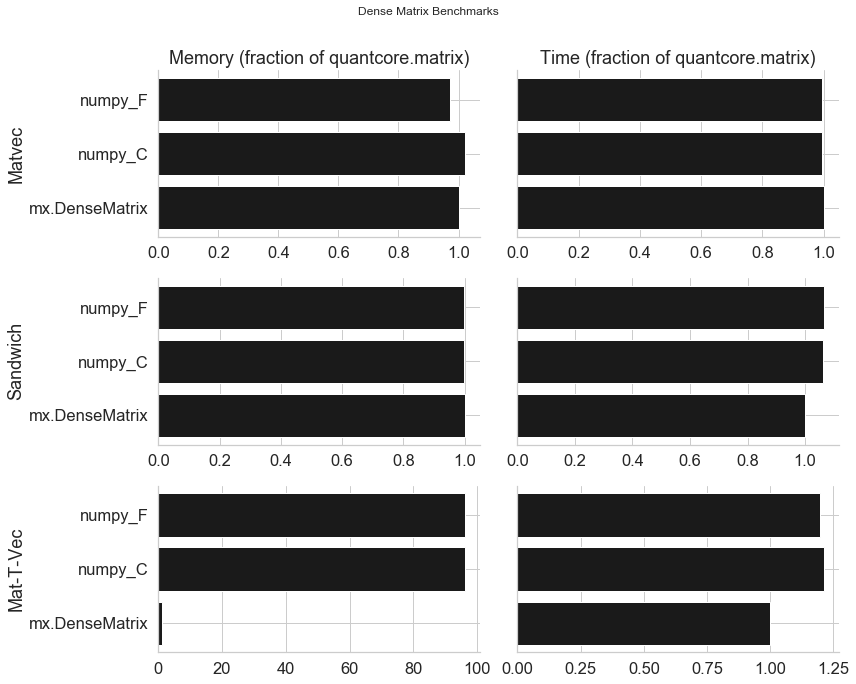

In [72]:
fname = 'dense_times.csv'
make_figure(pd.read_csv(fname), 'mx.DenseMatrix', 'Dense Matrix Benchmarks')
plt.savefig(fname[:-4] + '.png')

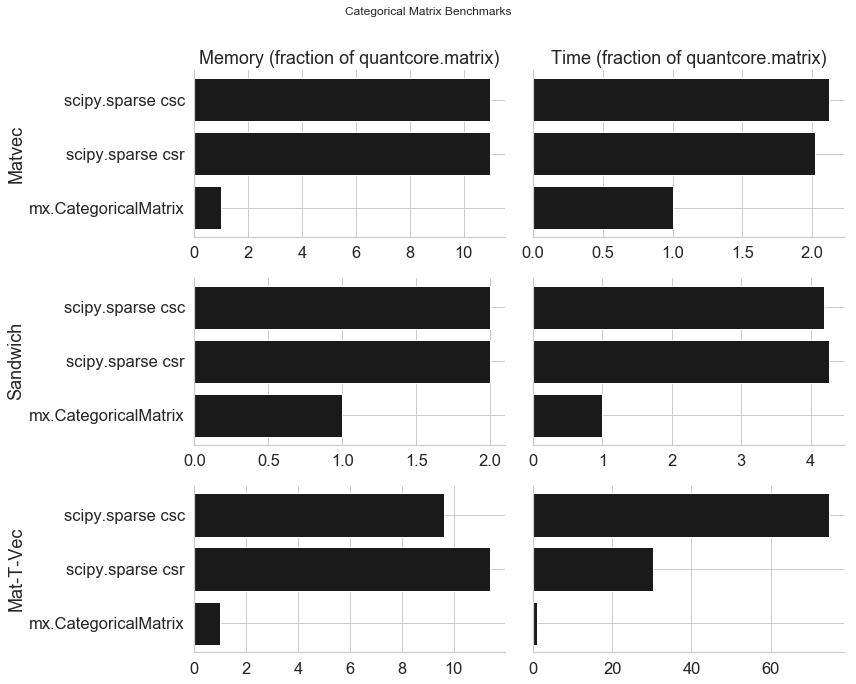

In [73]:
fname = 'one_cat_times.csv'
make_figure(pd.read_csv(fname), 'mx.CategoricalMatrix', 'Categorical Matrix Benchmarks')
plt.savefig(fname[:-4] + '.png')

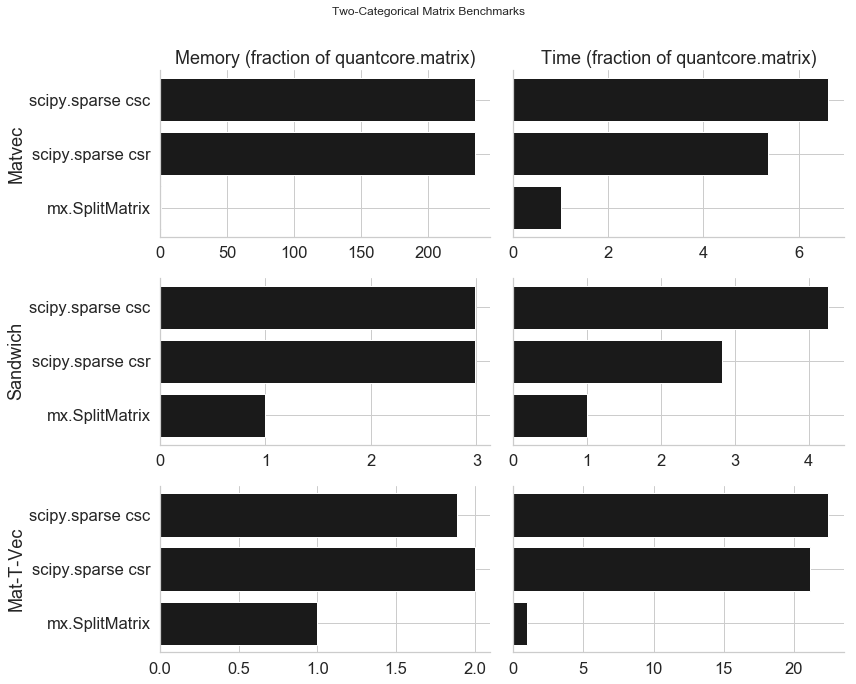

In [74]:
fname = 'two_cat_times.csv'
make_figure(pd.read_csv(fname), 'mx.SplitMatrix', 'Two-Categorical Matrix Benchmarks')
plt.savefig(fname[:-4] + '.png')

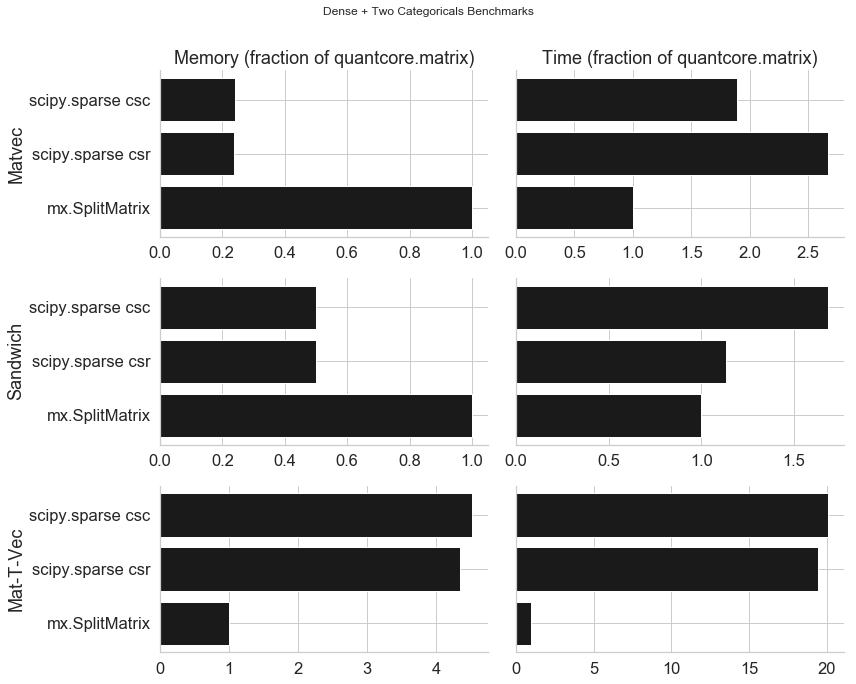

In [75]:
fname = 'dense_cat_times.csv'
make_figure(pd.read_csv(fname), 'mx.SplitMatrix', 'Dense + Two Categoricals Benchmarks')
plt.savefig(fname[:-4] + '.png')